In [1]:
import random 
import torch
from d2l import torch as d2l



In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)


In [3]:
print('features:', features[0], '\nlabel:', labels[0])


features: tensor([-1.1189, -0.5909]) 
label: tensor([3.9761])


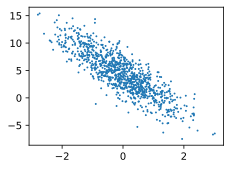

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)


In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break



tensor([[-0.4345,  0.2237],
        [ 1.7067, -0.1372],
        [-0.2731,  0.1252],
        [-1.1881,  0.5695],
        [ 1.2833, -2.1755],
        [ 0.2242, -0.1506],
        [ 1.3645,  0.2098],
        [ 0.1594, -0.5742],
        [-0.4110, -1.1677],
        [-1.3128, -0.0273]]) 
 tensor([[ 2.5897],
        [ 8.0837],
        [ 3.2198],
        [-0.0939],
        [14.1755],
        [ 5.1687],
        [ 6.2065],
        [ 6.4560],
        [ 7.3451],
        [ 1.6593]])


In [7]:
W = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)



In [8]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b


In [9]:
def sgdm(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            

In [10]:
lr = 0.03   
num_epochs = 3
net = linreg
loss = d2l.squared_loss

for epoch in range(num_epochs):

    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, W, b), y)
        l.sum().backward()
        sgdm([W, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, W, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(f'error in estimating w: {true_w - W.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')



epoch 1, loss 0.030964
epoch 2, loss 0.000106
epoch 3, loss 0.000049
error in estimating w: tensor([ 0.0003, -0.0006], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0004], grad_fn=<RsubBackward1>)
